In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')
X, y = dataset["data"], dataset["target"]

In [2]:
X = X / 255

In [3]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [4]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [5]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

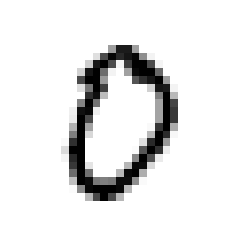

[0.]


In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 20
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [22]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [23]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [24]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6780408776417199
Epoch 100 cost:  1.7077023217932543e-05
Epoch 200 cost:  1.678816031514579e-05
Epoch 300 cost:  1.6509651885653094e-05
Epoch 400 cost:  1.624093606712164e-05
Epoch 500 cost:  1.5981491451608248e-05
Epoch 600 cost:  1.5730833482190265e-05
Epoch 700 cost:  1.5488511229804456e-05
Epoch 800 cost:  1.5254104504150423e-05
Epoch 900 cost:  1.502722125881756e-05
Epoch 1000 cost:  1.480749525615643e-05
Epoch 1100 cost:  1.4594583961953168e-05
Epoch 1200 cost:  1.4388166643867823e-05
Epoch 1300 cost:  1.418794265091873e-05
Epoch 1400 cost:  1.3993629854148793e-05
Epoch 1500 cost:  1.3804963231070123e-05
Epoch 1600 cost:  1.3621693578608523e-05
Epoch 1700 cost:  1.3443586341087414e-05
Epoch 1800 cost:  1.3270420541402634e-05
Epoch 1900 cost:  1.3101987804895002e-05
Final cost: 1.293970859349459e-05


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


In [26]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [48]:
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

X = X / 255

In [50]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [51]:
Y_new.shape , y.shape

((10, 70000), (1, 70000))

In [52]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

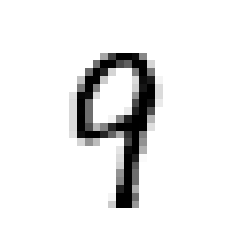

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [53]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [54]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [55]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.0383910781102
Epoch 100 cost:  0.7155320012760061
Epoch 200 cost:  0.5392929003419873
Epoch 300 cost:  0.46426100776571677
Epoch 400 cost:  0.4195674104133535
Epoch 500 cost:  0.38862206882887357
Epoch 600 cost:  0.3651920796312052
Epoch 700 cost:  0.34638705518046464
Epoch 800 cost:  0.33070726694167857
Epoch 900 cost:  0.3172949553062115
Epoch 1000 cost:  0.3056104924972408
Epoch 1100 cost:  0.29529434057262255
Epoch 1200 cost:  0.2860921117274261
Epoch 1300 cost:  0.27781048433591243
Epoch 1400 cost:  0.27029648815945784
Epoch 1500 cost:  0.2634297226398395
Epoch 1600 cost:  0.25711538283164875
Epoch 1700 cost:  0.25127642922789234
Epoch 1800 cost:  0.2458486648459898
Epoch 1900 cost:  0.24077822021907266
Final cost: 0.23606598209674404


In [56]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 950    0    7    1    3   12   11    0    7    8]
 [   0 1109    4    2    0    1    3   10    4    5]
 [   4    3  940   15    9    3    6   17   15    1]
 [   5    5   20  919    4   31    0    7   20   14]
 [   2    0    8    2  901    6   14   11   10   40]
 [   4    1    3   23    1  784   13    3   29    6]
 [  10    4   11    1   19   14  902    0   13    1]
 [   2    2   10   17    4   11    2  947    8   21]
 [   2   11   23   22    6   25    7    2  855   11]
 [   1    0    6    8   35    5    0   31   13  902]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       999
           1       0.98      0.97      0.98      1138
           2       0.91      0.93      0.92      1013
           3       0.91      0.90      0.90      1025
           4       0.92      0.91      0.91       994
           5       0.88      0.90      0.89       867
           6       0.94      0.93      0.93       975
           7       0.92      0.92   